In [1]:
%matplotlib inline
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movie_df=pd.read_csv('Resources/movies.csv')
movie_df = movie_df.loc[:, ~movie_df.columns.str.contains('^Unnamed')]
movie_df

,Id,Title (year),Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
users_df=pd.read_csv('Resources/users.csv',index_col=[0])
users_df

,Gender,Age,Occupation,Zip-Code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,2460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [4]:
rating_df=pd.read_csv('Resources/ratings.csv',index_col=[0])
df=rating_df
df

,MovieID,Rating,Timestamp
UserID,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746


In [5]:
df=df[(df.MovieID == 1193)]
df

,MovieID,Rating,Timestamp
UserID,,,
1,1193,5,978300760
2,1193,5,978298413
12,1193,4,978220179
15,1193,4,978199279
17,1193,5,978158471
...,...,...,...
6033,1193,5,956713500
6035,1193,5,956710879
6036,1193,5,956710766


In [6]:
df['Rating'].mean()
df['Rating'].var()
df['Rating'].std()

0.7900429158426995

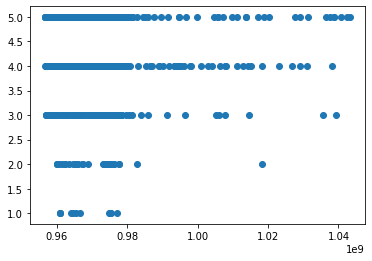

In [8]:
plt.scatter(df['Timestamp'],df['Rating'])
plt.show()